In [35]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def EulerDobPend(m1, m2, L1, L2, phi10, phi20, w10, w20, h, t_max, g=9.81):
    """
    m1, L1, phi10, w10 correspond to the mass length, initial angle, and initial angular velocity of the top pendulum
    m2, L2, phi20, w20 correspond to the same, but for the bottom pendulum
    h corresponds to the time step
    t_max corresponds to the greatest amout of time needed to calculate
    """
    
    def f1(t, phi1, phi2, w1, w2):
        return w1
    
    def g1(t, phi1, phi2, w1, w2):
        return (m2*g)/(m1*L1)*phi2 - (m1+m2)/(m1*L1)*g*phi1
    
    def f2(t, phi1, phi2, w1, w2):
        return w2
    
    def g2(t, phi1, phi2, w1, w2):
        return -(m2/m1+1)*g/L2*phi2 + (m1+m2)/(m1*L2)*g*phi1
    
    Nsteps = t_max/h
    t_range = h*np.arange(Nsteps)
    phi1 = np.zeros_like(t_range)
    phi2 = np.zeros_like(t_range)
    w1 = np.zeros_like(t_range)
    w2 = np.zeros_like(t_range)
    y = np.array([phi10, phi20, w10, w20])
    
    f_array = np.zeros_like(y)
    
    
    for i, t in enumerate(t_range):
        phi1[i] = y[0]
        phi2[i] = y[1]
        w1[i] = y[2]
        w2[i] = y[3]
        
        f_array[:] = f1(t, y[0], y[1], y[2], y[3]), f2(t, y[0], y[1], y[2], y[3]), g1(t, y[0], y[1], y[2], y[3]), g2(t, y[0], y[1], y[2], y[3])
        
        y = y + h*f_array
    return t_range, phi1, phi2, w1, w2

In [38]:
data = EulerDobPend(0.1, 0.1, 0.5, 0.5, 0.5, 0, 0, 0, 0.001, 10)

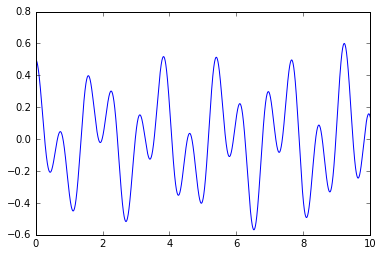

In [39]:
plt.plot(data[0], data[1])